In [1]:
from google.colab import drive

drive.mount('/content/drive')
path = 'drive/MyDrive/MUIA/TFM'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from os import listdir

#Leer todos los nombres de los ficheros de las empresas sobre las que realizar analisis

data_path = f'{path}/data/Cotizaciones_RAW'
file_names = [f for f in listdir(data_path)]
print(file_names)

['A3M.MC.csv', 'AMS.MC.csv', 'ALB.MC.csv', 'APPS.MC.csv', 'ACS.MC.csv', 'AENA.MC.csv', 'ALM.MC.csv', 'BKT.MC.csv', 'BBVA.MC.csv', 'ACX.MC.csv', 'ANA.MC.csv', 'CABK.MC.csv', 'EBRO.MC.csv', 'EDR.MC.csv', 'CIE.MC.csv', 'DIA.MC.csv', 'DOM.MC.csv', 'CAF.MC.csv', 'ECR.MC.csv', 'CLNX.MC.csv', 'COL.MC.csv', 'ELE.MC.csv', 'ENC.MC.csv', 'GRF.MC.csv', 'GRE.MC.csv', 'FAE.MC.csv', 'GEST.MC.csv', 'FER.MC.csv', 'ENG.MC.csv', 'GCO.MC.csv', 'IAG.MC.csv', 'FDR.MC.csv', 'IBE.MC.csv', 'ITX.MC.csv', 'IDR.MC.csv', 'MAP.MC.csv', 'LOG.MC.csv', 'MTS.MC.csv', 'NHH.MC.csv', 'MRL.MC.csv', 'MEL.MC.csv', 'NTGY.MC.csv', 'PHM.MC.csv', 'PSG.MC.csv', 'RED.MC.csv', 'ROVI.MC.csv', 'REP.MC.csv', 'SAB.MC.csv', 'SLR.MC.csv', 'SAN.MC.csv', 'SCYR.MC.csv', 'TEF.MC.csv', 'TL5.MC.csv', 'TLGO.MC.csv', 'UNI.MC.csv', 'VID.MC.csv', 'VIS.MC.csv']


In [3]:
import pandas as pd

#Create a dictionary with all the historical data of each company
data_companies = {}

for file in file_names:
  df = pd.read_csv(f'{data_path}/{file}')
  ticker_name = file[:-7]
  data_companies[ticker_name] = df




In [4]:
df = data_companies['ACS']
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-01-02,9.196650,9.616650,9.066650,9.196650,2.913879,220908
1,2002-01-03,9.673320,9.673320,9.269990,9.673320,3.064908,187420
2,2002-01-04,9.433320,9.766650,9.286650,9.433320,2.988867,245490
3,2002-01-07,9.039990,9.796650,9.039990,9.039990,2.864243,192721
4,2002-01-08,9.083320,9.249990,9.066650,9.083320,2.877972,305129
...,...,...,...,...,...,...,...
5439,2023-03-14,28.000000,28.889999,28.000000,28.709999,28.709999,871796
5440,2023-03-15,28.799999,28.900000,28.030001,28.030001,28.030001,843638
5441,2023-03-16,28.309999,28.629999,27.930000,28.469999,28.469999,697969
5442,2023-03-17,28.670000,28.730000,27.790001,28.160000,28.160000,4329498


In [5]:
# Comprobación inicial para ver cual es el historico de datos disponible 
def check_first_date (data_companies):
  companies = []
  starts = []

  for company in data_companies:
    df = data_companies[company]
    #print(company)
    #print(df)
    start = df.iloc[0][0]
    companies.append(company)
    starts.append(start)

  data = {'Company': companies, 'Starting_Data': starts}
  df = pd.DataFrame(data)

  return df

check_first_date(data_companies)

,Company,Starting_Data
0,A3M,2003-10-29
1,AMS,2010-04-29
2,ALB,2000-01-03
3,APPS,2014-05-09
4,ACS,2002-01-02
5,AENA,2015-02-11
6,ALM,2007-06-20
7,BKT,2000-01-03
8,BBVA,2000-01-03
9,ACX,2000-01-03


In [6]:
# Eliminar datos previos a 2018
i = 0
data_companies_clean = {}
for company in data_companies:
  df = data_companies[company]
  # Dropping the rows of team 1 and team 2
  df = df[df["Date"].str.contains("2000|2001|2002|2003|2004|2005|2006|2007|2008|2009|2010|2011|2012|2013|2014|2015|2016|2017") == False]
  data_companies_clean[company] = df

# Comprobacion que todas las empresas tienen datos a partir del mismo punto de inicio
check_first_date(data_companies_clean)

,Company,Starting_Data
0,A3M,2018-01-02
1,AMS,2018-01-02
2,ALB,2018-01-02
3,APPS,2018-01-02
4,ACS,2018-01-02
5,AENA,2018-01-02
6,ALM,2018-01-02
7,BKT,2018-01-02
8,BBVA,2018-01-02
9,ACX,2018-01-02


In [7]:
df = data_companies_clean['FDR']
df

,Date,Open,High,Low,Close,Adj Close,Volume
2596,2018-01-02,12.000000,12.230000,11.61,11.705000,10.818427,114738
2597,2018-01-03,11.600000,11.940000,11.10,11.820000,10.924715,209951
2598,2018-01-04,11.820000,12.180000,11.82,11.900000,10.998656,100011
2599,2018-01-05,11.980000,12.280000,11.90,12.100000,11.183509,697619
2600,2018-01-08,12.260000,12.380000,12.10,12.180000,11.257448,99972
...,...,...,...,...,...,...,...
3927,2023-03-14,16.070000,16.860001,16.07,16.660000,16.660000,1503995
3928,2023-03-15,16.549999,16.570000,15.75,15.790000,15.790000,875459
3929,2023-03-16,16.059999,16.370001,15.86,16.309999,16.309999,705969
3930,2023-03-17,16.389999,16.639999,15.85,16.070000,16.070000,2169672


In [8]:
import numpy as np
print(np.shape(data_companies_clean['A3M']))
print(np.shape(data_companies_clean['ACS']))
print(np.shape(data_companies_clean['ROVI']))

(1336, 7)
(1336, 7)
(1336, 7)


In [9]:
# Crear un dataframe que sirva como entrada al modelo TDA
# Columna1 = fecha. El resto de columnas serán cada una de las empresas
# Filas = cada fila representa el precio de cierre en el dia determinado


dates = data_companies_clean['FDR'][['Date']].values.reshape(-1,).tolist()


df_TDA = pd.DataFrame()
df_TDA['Date'] = dates
#print(df_TDA)


for company in data_companies_clean:
  #print(company)
  prices = data_companies_clean[company][['Close']].values.reshape(-1,).tolist()
  #print(prices)
  df_TDA[company] = prices

df_TDA


,Date,A3M,AMS,ALB,APPS,ACS,AENA,ALM,BKT,BBVA,...,SAB,SLR,SAN,SCYR,TEF,TL5,TLGO,UNI,VID,VIS
0,2018-01-02,8.710,60.220001,48.349998,11.220,32.255001,170.500000,8.348511,7.953,7.082,...,1.655001,1.660000,5.226751,2.500,8.191,9.400,4.397,1.2900,66.521370,54.700001
1,2018-01-03,8.665,60.500000,49.299999,11.230,32.470001,172.399994,8.539362,7.964,7.094,...,1.676181,1.920000,5.227709,2.459,8.166,9.432,4.430,1.3100,66.286316,55.000000
2,2018-01-04,8.770,61.820000,49.750000,11.430,33.490002,175.399994,8.612767,8.082,7.221,...,1.717063,1.960000,5.403084,2.553,8.295,9.574,4.470,1.3200,66.286316,55.599998
3,2018-01-05,8.865,63.500000,50.299999,11.570,33.939999,177.350006,8.563830,8.140,7.253,...,1.738736,2.040000,5.438543,2.572,8.358,9.830,4.450,1.3150,66.599724,56.500000
4,2018-01-08,8.750,62.959999,49.700001,11.540,33.650002,178.250000,8.632341,8.124,7.235,...,1.729870,2.270000,5.454834,2.600,8.370,9.570,4.405,1.3070,66.443016,56.150002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1331,2023-03-14,3.466,60.459999,44.849998,7.580,28.709999,153.199997,8.735000,6.098,6.690,...,1.139000,17.540001,3.445500,2.928,3.811,3.098,3.190,1.0890,95.699997,65.599998
1332,2023-03-15,3.380,58.160000,44.450001,7.310,28.030001,145.949997,8.670000,5.704,6.048,...,1.019500,16.830000,3.208000,2.828,3.753,3.052,3.065,1.0230,94.000000,66.199997
1333,2023-03-16,3.380,59.400002,44.799999,7.410,28.469999,148.449997,8.815000,5.560,6.254,...,1.014500,17.040001,3.291500,2.852,3.722,3.062,3.075,1.0050,95.099998,66.800003
1334,2023-03-17,3.346,58.320000,45.299999,7.280,28.160000,142.399994,8.735000,5.420,6.036,...,0.982600,16.885000,3.138500,2.792,3.702,3.022,3.025,0.9875,94.199997,66.550003


In [10]:
# Verificar si hay datos que sean 0
0 in df_TDA.values

False

In [11]:
# Verificar si algun valor es null
df_TDA.isnull().sum()

Date    0
A3M     0
AMS     0
ALB     0
APPS    0
ACS     0
AENA    0
ALM     0
BKT     0
BBVA    0
ACX     0
ANA     0
CABK    0
EBRO    0
EDR     0
CIE     0
DIA     0
DOM     0
CAF     0
ECR     0
CLNX    0
COL     0
ELE     0
ENC     0
GRF     0
GRE     0
FAE     0
GEST    0
FER     0
ENG     0
GCO     0
IAG     0
FDR     0
IBE     0
ITX     0
IDR     0
MAP     0
LOG     0
MTS     0
NHH     0
MRL     0
MEL     0
NTGY    0
PHM     0
PSG     0
RED     0
ROVI    0
REP     0
SAB     0
SLR     0
SAN     0
SCYR    0
TEF     0
TL5     0
TLGO    0
UNI     0
VID     0
VIS     0
dtype: int64

In [12]:
df_TDA.to_excel(f'{path}/data/stocks_spain.xlsx')

Check historic data of IBEX35 (index). In order to check interestinf dates for future analysis

In [13]:
import pandas as pd

# Load the .csv file 
df_ibex = pd.read_csv(f'{path}/data/IBEX.csv')
df_ibex = df_ibex[['Date', 'Close']]
df_ibex

,Date,Close
0,2000-01-03,11610.000000
1,2000-01-04,11206.599609
2,2000-01-05,10863.099609
3,2000-01-06,NaN
4,2000-01-07,11102.400391
...,...,...
5962,2023-03-14,9159.000000
5963,2023-03-15,8759.099609
5964,2023-03-16,8890.200195
5965,2023-03-17,8719.299805


In [14]:
# Checking for missing values
print(df_ibex.isnull().sum())

# Deleting missing values
df_ibex.dropna(subset=['Date', 'Close'], inplace=True)
print(df_ibex.isnull().sum())

# Save it to a new file
df_ibex.to_csv(f'{path}/data/IBEX35_clean.csv')

Date      0
Close    64
dtype: int64
Date     0
Close    0
dtype: int64


In [15]:
import numpy as np
print(np.shape(df_ibex))
df_ibex

(5903, 2)


,Date,Close
0,2000-01-03,11610.000000
1,2000-01-04,11206.599609
2,2000-01-05,10863.099609
4,2000-01-07,11102.400391
5,2000-01-10,11173.299805
...,...,...
5962,2023-03-14,9159.000000
5963,2023-03-15,8759.099609
5964,2023-03-16,8890.200195
5965,2023-03-17,8719.299805


In [16]:
df_ibex['Date']

0       2000-01-03
1       2000-01-04
2       2000-01-05
4       2000-01-07
5       2000-01-10
           ...    
5962    2023-03-14
5963    2023-03-15
5964    2023-03-16
5965    2023-03-17
5966    2023-03-20
Name: Date, Length: 5903, dtype: object

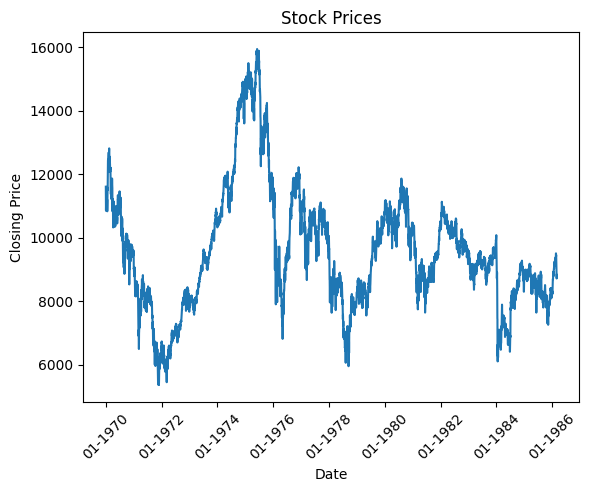

In [17]:
import matplotlib.pyplot as plt
from matplotlib.dates import AutoDateLocator, DateFormatter



# plot the dataframe
fig, ax = plt.subplots()
ax.plot(df_ibex['Date'], df_ibex['Close'])

date_locator = AutoDateLocator()
date_formatter = DateFormatter('%m-%Y')
ax.xaxis.set_major_locator(date_locator)
ax.xaxis.set_major_formatter(date_formatter)
ax.xaxis.set_tick_params(rotation=45)

# set the plot title and axis labels
ax.set_title('Stock Prices')
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')

# show the plot
plt.show()